In [131]:
#Import libraries
import pandas as pd
import seaborn as sns
import pingouin
import numpy as np
import matplotlib.pyplot as plt
import random

# Read in data
customer = pd.read_csv(r"C:\Users\GD\Desktop\Portfolio\BankChurners\BankChurners.csv")


In [132]:
#Datasets at first glance
customer.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [133]:
# Checking for null values inside dataset
customer.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [134]:
#Checking for duplicate values
customer.duplicated().sum()

0

In [135]:
#Remove 2 last column that do not support the analysis phase 
customer = customer.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
customer

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [136]:
#Count number of customers in each attrition group (existing/churn)
customer['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Text(0.5, 1.0, 'Attrition Flag Distribution')

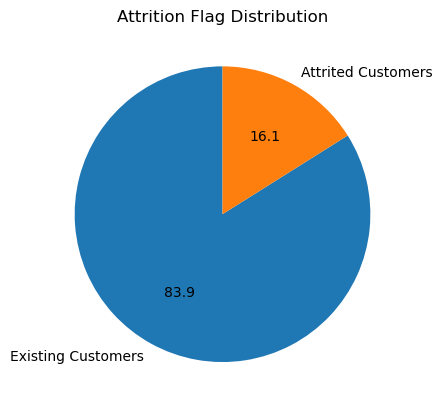

In [137]:
#Calculate the proportion between these 2 attrition group and plot the pie chart
attrition_prop=customer['Attrition_Flag'].value_counts(normalize = True)
plt.pie(x=attrition_prop,labels=['Existing Customers','Attrited Customers'],autopct='%.1f',startangle=90)
plt.title('Attrition Flag Distribution')

In [138]:
#Randomly sample 1627 existing customer compare with all attrited customer 
existing_customer = customer[customer['Attrition_Flag']=='Existing Customer']
existing_customer_samp = existing_customer.sample(n=1627)
existing_customer_samp

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9339,715728108,Existing Customer,27,F,0,Graduate,Unknown,Less than $40K,Blue,36,...,1,2,4548.0,1450,3098.0,0.844,14330,131,0.638,0.319
1994,713188383,Existing Customer,54,F,1,College,Married,Less than $40K,Blue,36,...,2,4,3084.0,2517,567.0,0.651,1446,22,0.833,0.816
2299,779783508,Existing Customer,45,M,2,Graduate,Married,$40K - $60K,Blue,34,...,1,3,13129.0,901,12228.0,0.825,2564,56,0.474,0.069
2985,714670533,Existing Customer,47,M,3,Unknown,Single,$80K - $120K,Blue,37,...,1,5,24580.0,2517,22063.0,0.509,3069,62,0.771,0.102
8693,721445658,Existing Customer,52,F,2,Post-Graduate,Single,Less than $40K,Blue,34,...,3,3,6265.0,1677,4588.0,0.769,8162,89,0.589,0.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,711900033,Existing Customer,57,F,0,Doctorate,Married,Unknown,Blue,46,...,2,1,4661.0,1734,2927.0,0.789,5242,81,1.382,0.372
9405,712517808,Existing Customer,42,M,5,High School,Married,$60K - $80K,Blue,36,...,4,3,3275.0,1525,1750.0,0.749,14830,112,0.697,0.466
7076,717855933,Existing Customer,38,F,2,High School,Married,$40K - $60K,Blue,27,...,2,3,1776.0,1586,190.0,0.798,4350,71,0.868,0.893
9441,721171008,Existing Customer,31,F,1,Unknown,Married,Less than $40K,Silver,36,...,3,1,10353.0,1520,8833.0,0.724,15028,124,0.746,0.147


In [139]:
# Doing right tail t-test on credit limit of 2 groups to checking if existing group have higher credit limit than treatment 
#group.
existing_samp_credit = existing_customer_samp['Credit_Limit']
attrited_credit = customer[customer['Attrition_Flag']=='Attrited Customer']['Credit_Limit']


# pingouin.test on credit limits
pingouin.ttest(x = existing_samp_credit,
               y = attrited_credit,
               paired= False,
               alternative = 'greater')
# The 'greater' alternative will test the null hypotheses that mean of x is not greater than y.

# Due to the very small p-value result (p-val=0.0149), we will reject the null hypotheses and confirm that mean of credit 
#limit of existing customer is higher than attrited customer one.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.171728,3252,greater,0.014974,"[168.06, inf]",0.076142,0.824,0.700703


In [140]:
# Doing right tail t-test on the total transitions amount of these 2 attrition groups to see if existing customers is using
#credit card money more than attrited customers

existing_samp_trans_amt = existing_customer_samp['Total_Trans_Amt']
attrited_trans_amt = customer[customer['Attrition_Flag']=='Attrited Customer']['Total_Trans_Amt']

# pingouin.test on total transition amount
pingouin.ttest(x = existing_samp_trans_amt,
               y = attrited_trans_amt,
               paired= False,
               alternative = 'greater')

# The 'greater' alternative will test the null hypotheses that mean of x is not greater than y.

# Due to the very small p-value result (p-val=6.5*10^-54), we will reject the null hypotheses and confirm that mean of 
#total amount of money transited by existing customer is higher than attrited customer money transited.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.70124,3252,greater,6.577584e-54,"[1470.09, inf]",0.550497,2.041e+50,1.0


In [141]:
# Doing right tail t-test on the utilization ratio of these 2 attrition groups to see if existing customers using their
#credit limit more efficiently compared to attrited customers

existing_samp_util_ratio =  existing_customer_samp['Avg_Utilization_Ratio']
attrited_util_ratio = customer[customer['Attrition_Flag']=='Attrited Customer']['Avg_Utilization_Ratio']

# pingouin.test on total utilization ratio
pingouin.ttest(x = existing_samp_util_ratio,
               y = attrited_util_ratio,
               paired= False,
               alternative = 'greater')
# This right tail test is testing the null hypotheses that the utilization ratio of existing customers is not greater than 
#the utilization ratio of attrited customers

# With the result of very small p value (2.7*10^-45), we will reject the null hypotheses and comfirm that the avg 
#utilization of existing customer is greater than avf utilization of attried customers.

#Thus we can conclude that the existing customers is using their credit card limit more efficiently

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,14.292759,3252,greater,2.722446e-45,"[0.12, inf]",0.501115,5.714e+41,1.0
